In [8]:
datos = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/tweet_feat_renta.csv"
import pandas as pd

df = pd.read_csv(datos)
df.columns

Index(['id', 'screen_name', 'text', 'location', 'localidad', 'provincia',
       'distrito', 'seccion', 'hora', 'verified', 'friends_count', 'followers',
       'tweets', ''¡'', ''!'', ''¿'', ''?'', 'URLs', 'adjetivos', 'emojis',
       'gerundio', 'hashtags', 'infinitivo', 'longitud media palabras',
       'mayúsculas', 'menciones', 'modo imperativo', 'modo indicativo',
       'modo subjuntivo', 'números', 'palabras', 'palabras vacías',
       'participio', 'plural', 'primera persona', 'segunda persona',
       'tercera persona', 'proporción palabras correctas',
       'sentimiento medio emojis', 'singular', 'sustantivos',
       'tiempo condicional', 'tiempo futuro', 'tiempo pasado',
       'tiempo presente', 'verbos', 'cambio1518', 'mediana', 'rentapais',
       'rentacom', 'sentiment'],
      dtype='object')

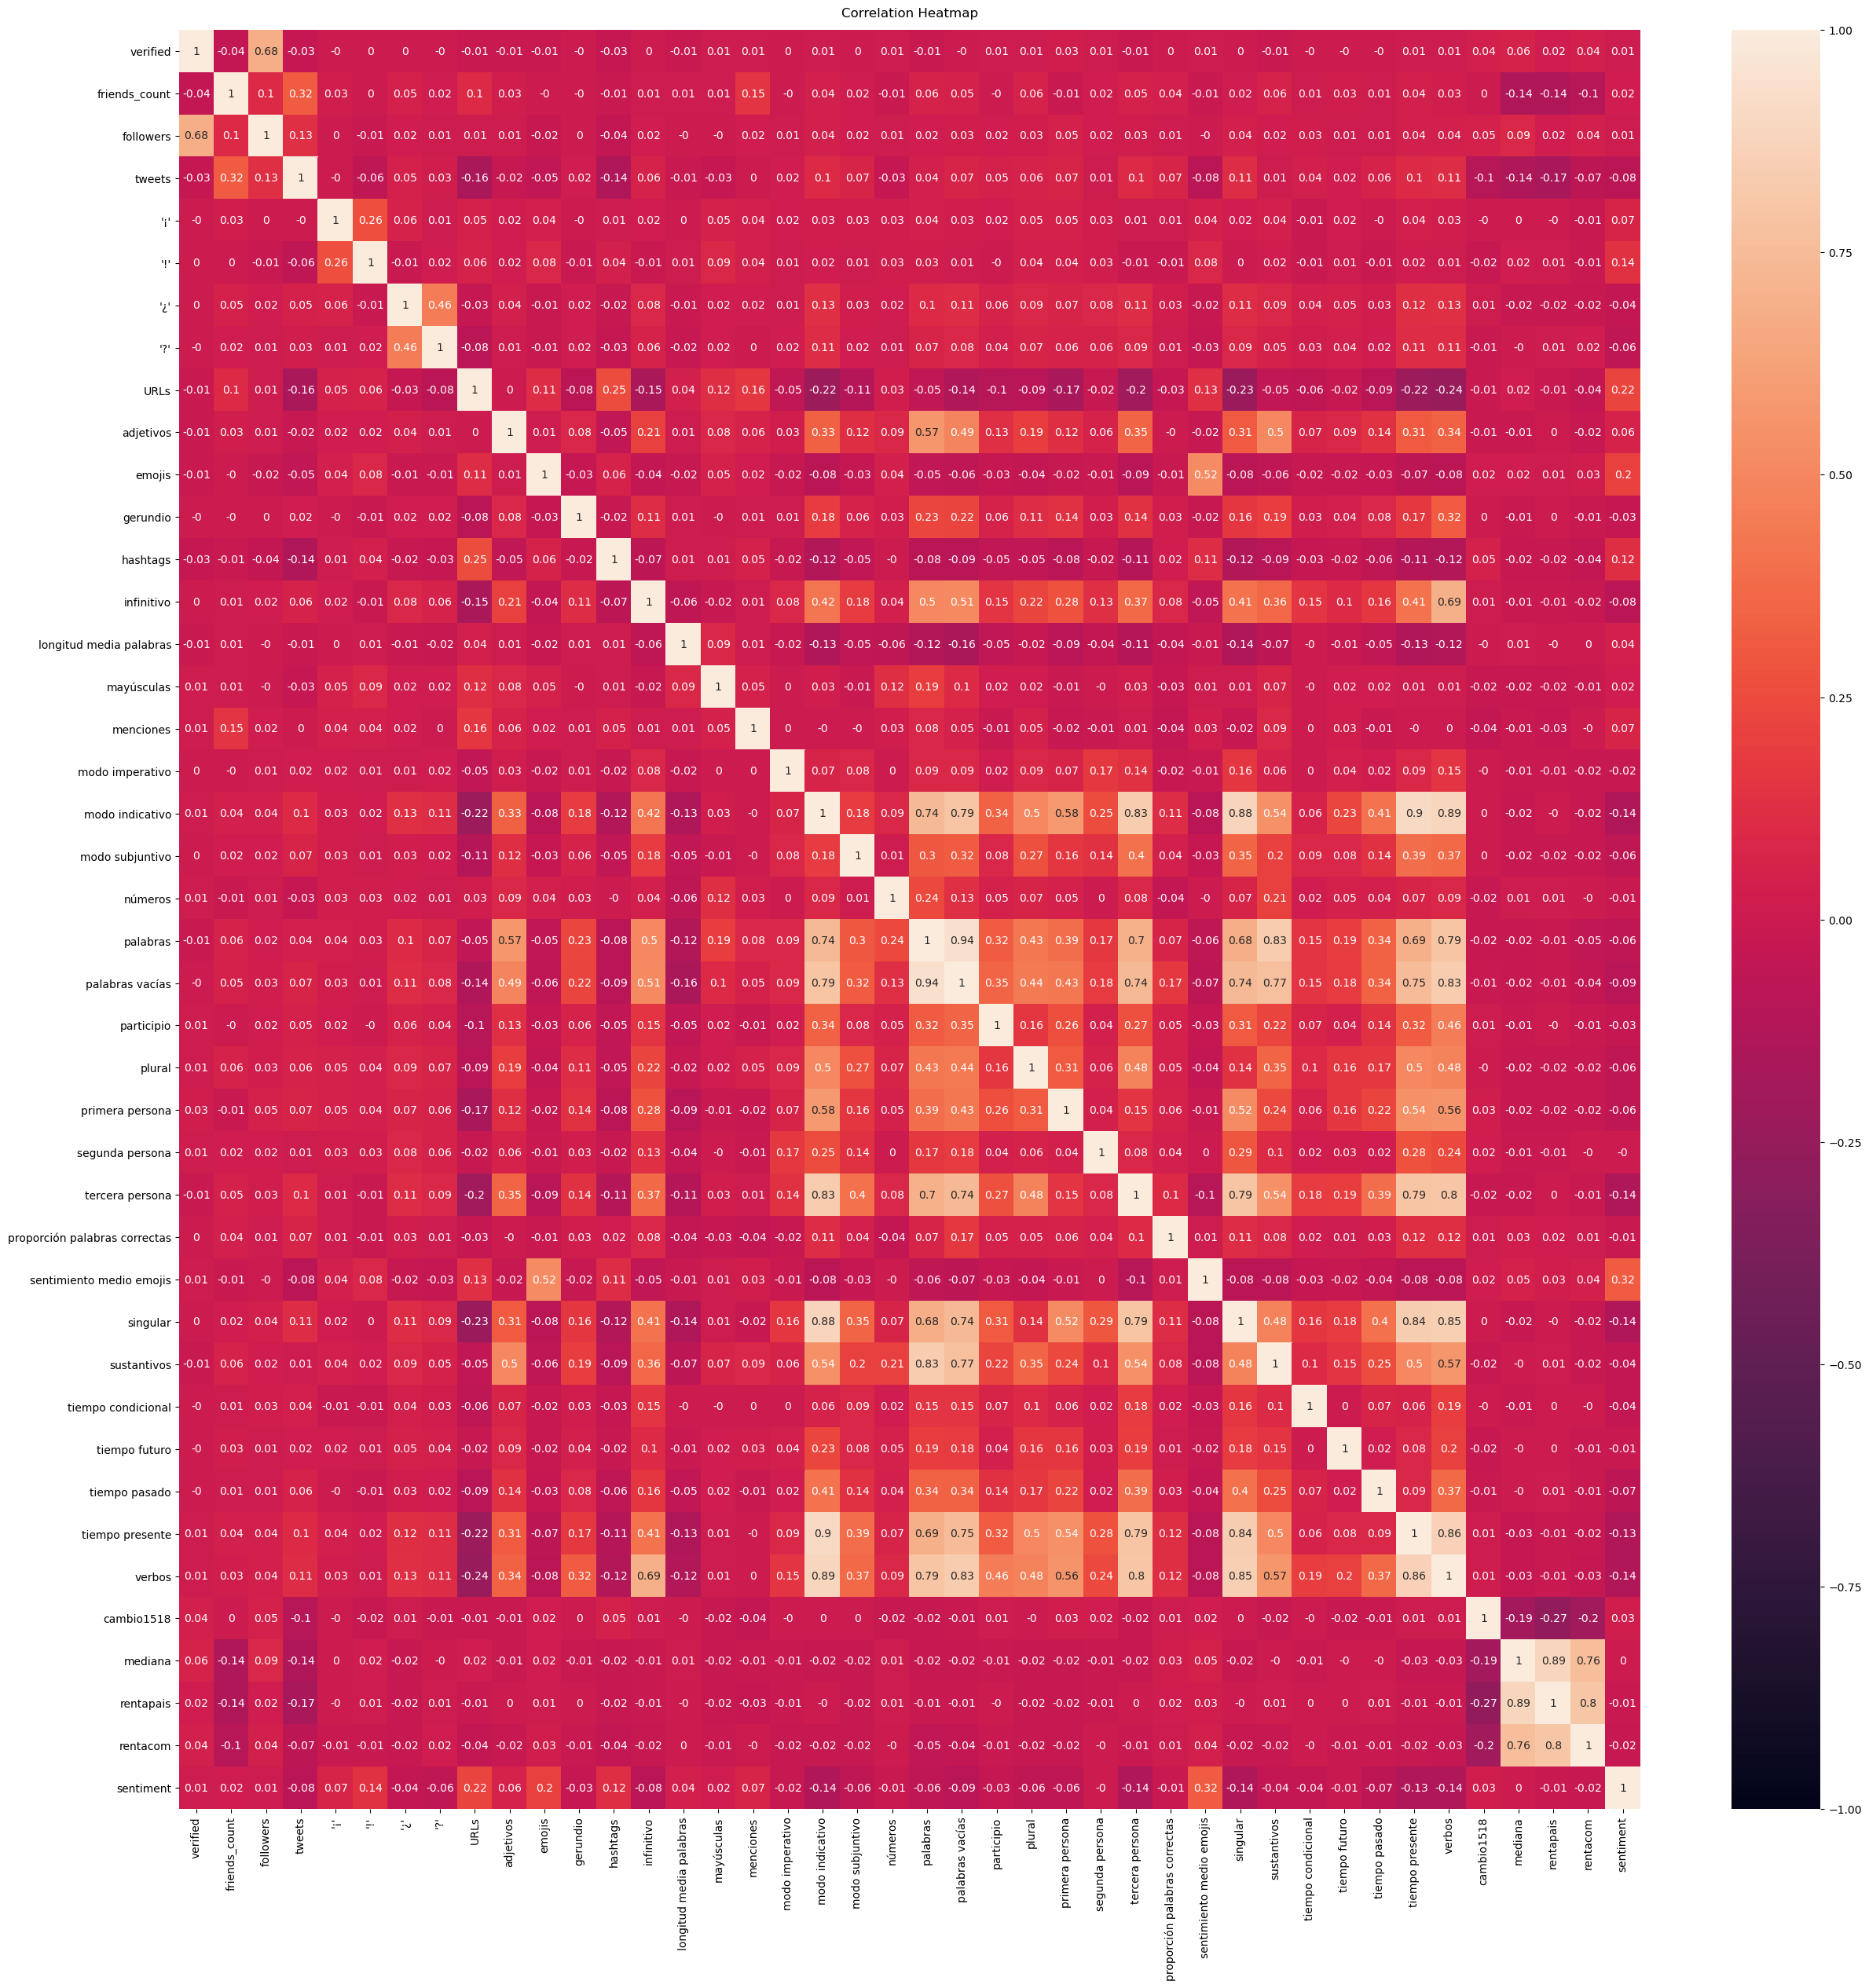

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


cols =   [ 'verified', 'friends_count', 'followers',
       'tweets', "'¡'", "'!'", "'¿'", "'?'", 'URLs', 'adjetivos', 'emojis',
       'gerundio', 'hashtags', 'infinitivo', 'longitud media palabras',
       'mayúsculas', 'menciones', 'modo imperativo', 'modo indicativo',
       'modo subjuntivo', 'números', 'palabras', 'palabras vacías',
       'participio', 'plural', 'primera persona', 'segunda persona',
       'tercera persona', 'proporción palabras correctas',
       'sentimiento medio emojis', 'singular', 'sustantivos',
       'tiempo condicional', 'tiempo futuro', 'tiempo pasado',
       'tiempo presente', 'verbos', 'cambio1518', 'mediana', 'rentapais',
       'rentacom','sentiment']

correlaciones = round(df[cols].corr(),2)

plt.figure(figsize=(30, 30),dpi=100)
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display
#the correlation values on the heatmap.
heatmap = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
# plt.savefig()

In [7]:
from scipy.stats import ttest_ind

def diferencia(df,col,por,cuantas):
    
    media = df[por].mean()
    std   = df[por].std()
    debajoMedia = df[df[por]<(media-cuantas*std)]
    encimaMedia = df[df[por]>(media+cuantas*std)]
    
    #muestro las medias
    mediaDebajoMedia = debajoMedia[col].mean()
    print('La media de',col,'de las personas que tienen',por,'menor es',mediaDebajoMedia)
    mediaEncimaMedia =encimaMedia[col].mean()
    print('La media de',col,'de las personas que tienen',por,'mayor es',mediaEncimaMedia)
    
    #mostrar la diferencia de medias en tanto por ciento
    #los ricos son un tanto por ciento mas positivo que los pobres
    porcentaje= ((mediaEncimaMedia-mediaDebajoMedia)/mediaDebajoMedia)*100
    print('La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es:',porcentaje)
    
    #veo si la diferencia de medias es estadísticamente significativa
    # hipótesis nula: las medias son iguales
    resultados = ttest_ind(debajoMedia[col], encimaMedia[col], equal_var=False)
    p = resultados[1]
    if p<0.01:
        print('La diferencia de medias es estadísticamente significativa.') #rechazo hipótesis nula
    else:
        print('la diferencia de medias NO es estadísticamente significativa')
    

## Variables con respecto a la renta (las dos: mediana y cambio1518)

In [10]:
cols=['sentimiento medio emojis','sentiment','adjetivos','emojis','hashtags','URLs','mayúsculas','menciones','números','palabras',
     'proporción palabras correctas','sustantivos','verbos','longitud media palabras']

for i in range(22):
    print('\n')
    col = cols[i]
    por = "mediana"
    cuantas = 0.5
    diferencia(df,col,por,cuantas)
    print('\n')
    por = "cambio1518"
    diferencia(df,col,por,cuantas)



La media de sentimiento medio emojis de las personas que tienen mediana menor es 0.1700501539924842
La media de sentimiento medio emojis de las personas que tienen mediana mayor es 0.24087798478637
La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es: 41.65114181373586
La diferencia de medias es estadísticamente significativa.


La media de sentimiento medio emojis de las personas que tienen cambio1518 menor es 0.2082194791050519
La media de sentimiento medio emojis de las personas que tienen cambio1518 mayor es 0.22946690052723098
La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es: 10.20433895690385
La diferencia de medias es estadísticamente significativa.


La media de sentiment de las personas que tienen mediana menor es 0.11720796952991136
La media de sentiment de las personas que tienen mediana mayor es 0.14253522115013437
La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es: 21.608813566008852
La diferencia

IndexError: list index out of range

Así que podemos concluir que se tiene que aquellos con renta mediana más alta utilizan emojis con un sentimiento medio más positivo que los que tienen renta mediana más baja. Y podemos concluir que aquellos cuya renta se ha incrementado más, utilizan emojis con sentimiento medio más positivo. Y se puede concluir que aquellos cuya renta mediana es mayor escriben tweets con un sentimiento más positivo que los que tienen menor renta mediana y se puede concluir que aquellos cuya renta ha incrementado más escriben tweets con un sentimiento más positivo que los otros

## Proporción de tweets que dedican los usuarios con más renta y los usuarios con menos renta a cada tiempo verbal. (mediana y cambio1518)

In [42]:
# filtramos por la mediana
por = "mediana"

media = df[por].mean()
std   = df[por].std()
cuantas = 0.5
debajomedia = df[df[por]<(media-cuantas*std)]
encimamedia = df[df[por]>(media+cuantas*std)]

#calculamos el total de tweets que incluyen tiempo pasado (A), presente (B), futuro (C) y condicional (D) las personas con menor mediana
numTweetsPasadoPobres=0
numTweetsPresentePobres=0
numTweetsFuturoPobres=0
numTweetsCondicionalPobres=0

for n,row in debajomedia.iterrows():
    if row["tiempo pasado"] > 0:
        numTweetsPasadoPobres+=1
    if row["tiempo presente"] > 0:
        numTweetsPresentePobres+=1
    if row["tiempo futuro"] > 0:
        numTweetsFuturoPobres+=1
    if row["tiempo condicional"] > 0:
        numTweetsCondicionalPobres+=1

#calculamos, A/(A+B+C+D), B/(A+B+C+D), C/(A+B+C+D), D/(A+B+C+D)
suma=numTweetsPasadoPobres+numTweetsPresentePobres+numTweetsFuturoPobres+numTweetsCondicionalPobres
PropTweetsPasadoPobres= numTweetsPasadoPobres/suma
PropTweetsPresentePobres=numTweetsPresentePobres/suma
PropTweetsFuturoPobres=numTweetsFuturoPobres/suma
PropTweetsCondicionalPobres=numTweetsCondicionalPobres/suma

print('La proporción de tweets que dedican los usuarios con menor mediana a:\n tiempo pasado:',PropTweetsPasadoPobres,
     '\n tiempo presente:',PropTweetsPresentePobres,'\n tiempo futuro:',PropTweetsFuturoPobres,'\n tiempo condicional:',
     PropTweetsCondicionalPobres)

#calculamos el total de tweets que incluyen tiempo pasado (A), presente (B), futuro (C) y condicional (D) las personas con mayor mediana
numTweetsPasadoRicos=0
numTweetsPresenteRicos=0
numTweetsFuturoRicos=0
numTweetsCondicionalRicos=0

for n,row in encimamedia.iterrows():
    if row["tiempo pasado"] > 0:
        numTweetsPasadoRicos+=1
    if row["tiempo presente"] > 0:
        numTweetsPresenteRicos+=1
    if row["tiempo futuro"] > 0:
        numTweetsFuturoRicos+=1
    if row["tiempo condicional"] > 0:
        numTweetsCondicionalRicos+=1

#calculamos, A/(A+B+C+D), B/(A+B+C+D), C/(A+B+C+D), D/(A+B+C+D)
suma=numTweetsPasadoRicos+numTweetsPresenteRicos+numTweetsFuturoRicos+numTweetsCondicionalRicos
PropTweetsPasadoRicos= numTweetsPasadoRicos/suma
PropTweetsPresenteRicos=numTweetsPresenteRicos/suma
PropTweetsFuturoRicos=numTweetsFuturoRicos/suma
PropTweetsCondicionalRicos=numTweetsCondicionalRicos/suma

print('\nLa proporción de tweets que dedican los usuarios con mayor mediana a:\n tiempo pasado:',PropTweetsPasadoRicos,
     '\n tiempo presente:',PropTweetsPresenteRicos,'\n tiempo futuro:',PropTweetsFuturoRicos,'\n tiempo condicional:',
     PropTweetsCondicionalRicos,'\n')

#filtramos por cambio1518
por = "cambio1518"

media = df[por].mean()
std   = df[por].std()
cuantas = 0.5
debajomedia = df[df[por]<(media-cuantas*std)]
encimamedia = df[df[por]>(media+cuantas*std)]

#calculamos el total de tweets que incluyen tiempo pasado (A), presente (B), futuro (C) y condicional (D) las personas con menor cambio1518
numTweetsPasadoPobres=0
numTweetsPresentePobres=0
numTweetsFuturoPobres=0
numTweetsCondicionalPobres=0

for n,row in debajomedia.iterrows():
    if row["tiempo pasado"] > 0:
        numTweetsPasadoPobres+=1
    if row["tiempo presente"] > 0:
        numTweetsPresentePobres+=1
    if row["tiempo futuro"] > 0:
        numTweetsFuturoPobres+=1
    if row["tiempo condicional"] > 0:
        numTweetsCondicionalPobres+=1

#calculamos, A/(A+B+C+D), B/(A+B+C+D), C/(A+B+C+D), D/(A+B+C+D)
suma=numTweetsPasadoPobres+numTweetsPresentePobres+numTweetsFuturoPobres+numTweetsCondicionalPobres
PropTweetsPasadoPobres= numTweetsPasadoPobres/suma
PropTweetsPresentePobres=numTweetsPresentePobres/suma
PropTweetsFuturoPobres=numTweetsFuturoPobres/suma
PropTweetsCondicionalPobres=numTweetsCondicionalPobres/suma

print('\nLa proporción de tweets que dedican los usuarios con menor cambio1518 a:\n tiempo pasado:',PropTweetsPasadoPobres,
     '\n tiempo presente:',PropTweetsPresentePobres,'\n tiempo futuro:',PropTweetsFuturoPobres,'\n tiempo condicional:',
     PropTweetsCondicionalPobres)

#calculamos el total de tweets que incluyen tiempo pasado (A), presente (B), futuro (C) y condicional (D) las personas con mayor cambio1518
numTweetsPasadoRicos=0
numTweetsPresenteRicos=0
numTweetsFuturoRicos=0
numTweetsCondicionalRicos=0

for n,row in encimamedia.iterrows():
    if row["tiempo pasado"] > 0:
        numTweetsPasadoRicos+=1
    if row["tiempo presente"] > 0:
        numTweetsPresenteRicos+=1
    if row["tiempo futuro"] > 0:
        numTweetsFuturoRicos+=1
    if row["tiempo condicional"] > 0:
        numTweetsCondicionalRicos+=1

#calculamos, A/(A+B+C+D), B/(A+B+C+D), C/(A+B+C+D), D/(A+B+C+D)
suma=numTweetsPasadoRicos+numTweetsPresenteRicos+numTweetsFuturoRicos+numTweetsCondicionalRicos
PropTweetsPasadoRicos= numTweetsPasadoRicos/suma
PropTweetsPresenteRicos=numTweetsPresenteRicos/suma
PropTweetsFuturoRicos=numTweetsFuturoRicos/suma
PropTweetsCondicionalRicos=numTweetsCondicionalRicos/suma

print('\nLa proporción de tweets que dedican los usuarios con mayor cambio1518 a:\n tiempo pasado:',PropTweetsPasadoRicos,
     '\n tiempo presente:',PropTweetsPresenteRicos,'\n tiempo futuro:',PropTweetsFuturoRicos,'\n tiempo condicional:',
     PropTweetsCondicionalRicos)



La proporción de tweets que dedican los usuarios con menor mediana a:
 tiempo pasado: 0.15337001375515819 
 tiempo presente: 0.754011921137093 
 tiempo futuro: 0.061898211829436035 
 tiempo condicional: 0.0307198532783127

La proporción de tweets que dedican los usuarios con mayor mediana a:
 tiempo pasado: 0.1580434398728589 
 tiempo presente: 0.7512508093472247 
 tiempo futuro: 0.06156925069162399 
 tiempo condicional: 0.029136500088292425 


La proporción de tweets que dedican los usuarios con menor cambio1518 a:
 tiempo pasado: 0.16609730848861284 
 tiempo presente: 0.7361801242236025 
 tiempo futuro: 0.06687370600414079 
 tiempo condicional: 0.03084886128364389

La proporción de tweets que dedican los usuarios con mayor cambio1518 a:
 tiempo pasado: 0.1556597950870263 
 tiempo presente: 0.7628070608566844 
 tiempo futuro: 0.05345019133440316 
 tiempo condicional: 0.028082952721886188


## Proporción de tweets que dedican los usuarios con más renta y los usuarios con menos renta a cada persona.(mediana y cambio1518)

In [44]:
# filtramos por la mediana
por = "mediana"

media = df[por].mean()
std   = df[por].std()
cuantas = 0.5
debajomedia = df[df[por]<(media-cuantas*std)]
encimamedia = df[df[por]>(media+cuantas*std)]

#calculamos el total de tweets que incluyen primera persona (A), segunda persona (B), y tercera persona (C) las personas con menor mediana
numTweetsPrimeraPobres=0
numTweetsSegundaPobres=0
numTweetsTerceraPobres=0

for n,row in debajomedia.iterrows():
    if row["primera persona"] > 0:
        numTweetsPrimeraPobres+=1
    if row["segunda persona"] > 0:
        numTweetsSegundaPobres+=1
    if row["tercera persona"] > 0:
        numTweetsTerceraPobres+=1

#calculamos, A/(A+B+C), B/(A+B+C), C/(A+B+C)
suma=numTweetsPrimeraPobres+numTweetsSegundaPobres+numTweetsTerceraPobres
PropTweetsPrimeraPobres= numTweetsPrimeraPobres/suma
PropTweetsSegundaPobres=numTweetsSegundaPobres/suma
PropTweetsTerceraPobres=numTweetsTerceraPobres/suma

print('La proporción de tweets que dedican los usuarios con menor mediana a:\n primera persona:',PropTweetsPrimeraPobres,
     '\n segunda persona:',PropTweetsSegundaPobres,'\n tercera persona:',PropTweetsTerceraPobres)

#calculamos el total de tweets que incluyen primera persona (A), segunda persona (B), y tercera persona (C) las personas con mayor mediana
numTweetsPrimeraRicos=0
numTweetsSegundaRicos=0
numTweetsTerceraRicos=0

for n,row in encimamedia.iterrows():
    if row["primera persona"] > 0:
        numTweetsPrimeraRicos+=1
    if row["segunda persona"] > 0:
        numTweetsSegundaRicos+=1
    if row["tercera persona"] > 0:
        numTweetsTerceraRicos+=1

#calculamos, A/(A+B+C), B/(A+B+C), C/(A+B+C)
suma=numTweetsPrimeraRicos+numTweetsSegundaRicos+numTweetsTerceraRicos
PropTweetsPrimeraRicos= numTweetsPrimeraRicos/suma
PropTweetsSegundaRicos=numTweetsSegundaRicos/suma
PropTweetsTerceraRicos=numTweetsTerceraRicos/suma

print('\nLa proporción de tweets que dedican los usuarios con mayor mediana a:\n primera persona:',PropTweetsPrimeraRicos,
     '\n segunda persona:',PropTweetsSegundaRicos,'\n tercera persona:',PropTweetsTerceraRicos,'\n')


# filtramos por cambio1518
por = "cambio1518"

media = df[por].mean()
std   = df[por].std()
cuantas = 0.5
debajomedia = df[df[por]<(media-cuantas*std)]
encimamedia = df[df[por]>(media+cuantas*std)]

#calculamos el total de tweets que incluyen primera persona (A), segunda persona (B), y tercera persona (C) las personas con menor cambio1518
numTweetsPrimeraPobres=0
numTweetsSegundaPobres=0
numTweetsTerceraPobres=0

for n,row in debajomedia.iterrows():
    if row["primera persona"] > 0:
        numTweetsPrimeraPobres+=1
    if row["segunda persona"] > 0:
        numTweetsSegundaPobres+=1
    if row["tercera persona"] > 0:
        numTweetsTerceraPobres+=1

#calculamos, A/(A+B+C), B/(A+B+C), C/(A+B+C)
suma=numTweetsPrimeraPobres+numTweetsSegundaPobres+numTweetsTerceraPobres
PropTweetsPrimeraPobres= numTweetsPrimeraPobres/suma
PropTweetsSegundaPobres=numTweetsSegundaPobres/suma
PropTweetsTerceraPobres=numTweetsTerceraPobres/suma

print('\nLa proporción de tweets que dedican los usuarios con menor cambio1518 a:\n primera persona:',PropTweetsPrimeraPobres,
     '\n segunda persona:',PropTweetsSegundaPobres,'\n tercera persona:',PropTweetsTerceraPobres)

#calculamos el total de tweets que incluyen primera persona (A), segunda persona (B), y tercera persona (C) las personas con mayor cambio1518
numTweetsPrimeraRicos=0
numTweetsSegundaRicos=0
numTweetsTerceraRicos=0

for n,row in encimamedia.iterrows():
    if row["primera persona"] > 0:
        numTweetsPrimeraRicos+=1
    if row["segunda persona"] > 0:
        numTweetsSegundaRicos+=1
    if row["tercera persona"] > 0:
        numTweetsTerceraRicos+=1

#calculamos, A/(A+B+C), B/(A+B+C), C/(A+B+C)
suma=numTweetsPrimeraRicos+numTweetsSegundaRicos+numTweetsTerceraRicos
PropTweetsPrimeraRicos= numTweetsPrimeraRicos/suma
PropTweetsSegundaRicos=numTweetsSegundaRicos/suma
PropTweetsTerceraRicos=numTweetsTerceraRicos/suma

print('\nLa proporción de tweets que dedican los usuarios con mayor cambio1518 a:\n primera persona:',PropTweetsPrimeraRicos,
     '\n segunda persona:',PropTweetsSegundaRicos,'\n tercera persona:',PropTweetsTerceraRicos)



La proporción de tweets que dedican los usuarios con menor mediana a:
 primera persona: 0.3146628170756857 
 segunda persona: 0.0701175500103114 
 tercera persona: 0.6152196329140028

La proporción de tweets que dedican los usuarios con mayor mediana a:
 primera persona: 0.30765083301881707 
 segunda persona: 0.06771984687550547 
 tercera persona: 0.6246293201056775 


La proporción de tweets que dedican los usuarios con menor cambio1518 a:
 primera persona: 0.29005001699606664 
 segunda persona: 0.06239984460739086 
 tercera persona: 0.6475501383965425

La proporción de tweets que dedican los usuarios con mayor cambio1518 a:
 primera persona: 0.3354643152383577 
 segunda persona: 0.07274731330945164 
 tercera persona: 0.5917883714521907


**Observación: en este apartado podemos argumentar el locus of control de psicología**

## Comparamos sentimiento para tweets de renta alta y tiempo futuro con tweets de renta baja y tiempo futuro

**Objetivo: ver si el "sentimiento" en futuro es distinto entre ricos y pobres.**

In [56]:
df2 = df [df["tiempo futuro"]>0]
col = 'sentimiento medio emojis'
por = "mediana"
cuantas = 0.5
print('En tiempo futuro:\n')
diferencia(df2,col,por,cuantas)

print('\n')
col = 'sentimiento medio emojis'
por = "cambio1518"
diferencia(df2,col,por,cuantas)

print('\n')
col = 'sentiment'
por = "mediana"
diferencia(df2,col,por,cuantas)

print('\n')
col = 'sentiment'
por = "cambio1518"
diferencia(df2,col,por,cuantas)

En tiempo futuro:

La media de sentimiento medio emojis de las personas que tienen mediana menor es 0.16927865961199293
La media de sentimiento medio emojis de las personas que tienen mediana mayor es 0.22230909891043732
La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es: 31.327303406109515
La diferencia de medias es estadísticamente significativa.


La media de sentimiento medio emojis de las personas que tienen cambio1518 menor es 0.1634791635952626
La media de sentimiento medio emojis de las personas que tienen cambio1518 mayor es 0.22884840980187696
La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es: 39.98628618412424
La diferencia de medias es estadísticamente significativa.


La media de sentiment de las personas que tienen mediana menor es 0.07773014592592595
La media de sentiment de las personas que tienen mediana mayor es 0.13255129063097515
La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es: 70.5275206

Luego se puede concluir que el sentimiento medio de emojis en un tweet en tiempo futuro es más positivo en aquellas personas cuya renta mediana es mayor y que el sentimiento medio de emojis en un tweet en tiempo futuro es más positivo en aquellas personas cuya renta se ha incrementado más. Por otra parte no se puede concluir que el sentimiento del tweet en tiempo futuro sea más positivo en aquellas personas cuya renta mediana es mayor. Ya que en general las medias son iguales. Pero sí se puede concluir que el sentimiento del tweet en tiempo futuro es más positivo en aquellas personas cuya renta se ha incrementado más

## Comparamos signos de puntuación para tweets de renta alta y tiempo futuro con tweets de renta baja y tiempo futuro

In [57]:
df2 = df [df["tiempo futuro"]>0]
col = "'?'"
por = "mediana"
cuantas = 0.5
print('En tiempo futuro:\n')
diferencia(df2,col,por,cuantas)

print('\n')
col = "'?'"
por = "cambio1518"
diferencia(df2,col,por,cuantas)

print('\n')
col = "'!'"
por = "mediana"
diferencia(df2,col,por,cuantas)

print('\n')
col = "'!'"
por = "cambio1518"
diferencia(df2,col,por,cuantas)

En tiempo futuro:

La media de '?' de las personas que tienen mediana menor es 0.16296296296296298
La media de '?' de las personas que tienen mediana mayor es 0.16634799235181644
La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es: 2.07717712497826
la diferencia de medias NO es estadísticamente significativa


La media de '?' de las personas que tienen cambio1518 menor es 0.16795665634674922
La media de '?' de las personas que tienen cambio1518 mayor es 0.18886861313868614
La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es: 12.450805610683178
la diferencia de medias NO es estadísticamente significativa


La media de '!' de las personas que tienen mediana menor es 0.18518518518518517
La media de '!' de las personas que tienen mediana mayor es 0.245697896749522
La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es: 32.676864244741886
la diferencia de medias NO es estadísticamente significativa


La media de '!' de las

Luego no se puede concluir que el número de interrogaciones de cerrar en tiempo futuro sea mayor en aquellas personas cuya renta mediana es mayor. Ya que en general las medias son iguales.Y tampoco se puede concluir que el número de interrogaciones de cerrar en tiempo futuro sea mayor en aquellas personas cuya renta ha incrementado más ni que el número de exclamaciones de cerrar en tiempo futuro sea mayor en aquellas personas cuya renta mediana es mayor.Ya que en general las medias son iguales. Tampoco se puede concluir que el número de exclamaciones de cerrar en tiempo futuro sea mayor en aquellas personas cuya renta ha incrementado menos.

## Comparamos sentimiento para tweets de renta alta y tiempo pasado con tweets de renta baja y tiempo pasado

**Objetivo: ver si el "sentimiento" en pasado es distinto entre ricos y pobres.**

In [58]:
df2 = df [df["tiempo pasado"]>0]
col = 'sentimiento medio emojis'
por = "mediana"
cuantas = 0.5
print('En tiempo pasado:\n')
diferencia(df2,col,por,cuantas)

print('\n')
col = 'sentimiento medio emojis'
por = "cambio1518"
diferencia(df2,col,por,cuantas)

print('\n')
col = 'sentiment'
por = "mediana"
diferencia(df2,col,por,cuantas)

print('\n')
col = 'sentiment'
por = "cambio1518"
diferencia(df2,col,por,cuantas)

En tiempo pasado:

La media de sentimiento medio emojis de las personas que tienen mediana menor es 0.1529310077067925
La media de sentimiento medio emojis de las personas que tienen mediana mayor es 0.2012609076526978
La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es: 31.602420379368702
La diferencia de medias es estadísticamente significativa.


La media de sentimiento medio emojis de las personas que tienen cambio1518 menor es 0.16357650618696323
La media de sentimiento medio emojis de las personas que tienen cambio1518 mayor es 0.18242359128185903
La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es: 11.521877764863204
la diferencia de medias NO es estadísticamente significativa


La media de sentiment de las personas que tienen mediana menor es 0.025329504334828112
La media de sentiment de las personas que tienen mediana mayor es 0.02379215083798885
La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es: -6.0694

Luego se puede concluir que el sentimiento medio de emojis en un tweet en tiempo pasado es más positivo en aquellas personas cuya renta mediana es mayor. Pero no se puede concluir que el sentimiento medio de emojis en un tweet en tiempo pasado sea más positivo en aquellas personas cuya renta se ha incrementado más, ya que en general las medias son iguales. Tampoco se puede concluir que el sentimiento del tweet en tiempo pasado sea más positivo en aquellas personas cuya renta mediana es menor ni que  el sentimiento del tweet en tiempo pasado sea más positivo en aquellas personas cuya renta se ha incrementado menos.

## Comparamos signos de puntuación para tweets de renta alta y tiempo pasado con tweets de renta baja y tiempo pasado

In [59]:
df2 = df [df["tiempo pasado"]>0]
col = "'?'"
por = "mediana"
cuantas = 0.5
print('En tiempo pasado:\n')
diferencia(df2,col,por,cuantas)

print('\n')
col = "'?'"
por = "cambio1518"
diferencia(df2,col,por,cuantas)

print('\n')
col = "'!'"
por = "mediana"
diferencia(df2,col,por,cuantas)

print('\n')
col = "'!'"
por = "cambio1518"
diferencia(df2,col,por,cuantas)

En tiempo pasado:

La media de '?' de las personas que tienen mediana menor es 0.13243647234678624
La media de '?' de las personas que tienen mediana mayor es 0.11992551210428305
La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es: -9.4467634336734
la diferencia de medias NO es estadísticamente significativa


La media de '?' de las personas que tienen cambio1518 menor es 0.12090994079152384
La media de '?' de las personas que tienen cambio1518 mayor es 0.13826771653543307
La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es: 14.355954217063074
la diferencia de medias NO es estadísticamente significativa


La media de '!' de las personas que tienen mediana menor es 0.19760837070254111
La media de '!' de las personas que tienen mediana mayor es 0.16983240223463686
La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es: -14.056068763258658
la diferencia de medias NO es estadísticamente significativa


La media de '!' de 

Luego no se puede concluir que el número de interrogaciones de cerrar en tiempo pasado sea mayor en aquellas personas cuya renta mediana es menor, ya que en general las medias son iguales. Tampoco se puede concluir que el número de interrogaciones de cerrar en tiempo pasado sea mayor en aquellas personas cuya renta ha incrementado más ni que el número de exclamaciones de cerrar en tiempo pasado sea mayor en aquellas personas cuya renta mediana es menor, ni que el número de exclamaciones de cerrar en tiempo pasado sea mayor en aquellas personas cuya renta ha incrementado menos.

## Comparamos sentimiento para tweets de renta alta y tiempo presente con tweets de renta baja y tiempo presente

**Objetivo: ver si el "sentimiento" en presente es distinto entre ricos y pobres.**

In [60]:
df2 = df [df["tiempo presente"]>0]
col = 'sentimiento medio emojis'
por = "mediana"
cuantas = 0.5
print('En tiempo presente:\n')
diferencia(df2,col,por,cuantas)

print('\n')
col = 'sentimiento medio emojis'
por = "cambio1518"
diferencia(df2,col,por,cuantas)

print('\n')
col = 'sentiment'
por = "mediana"
diferencia(df2,col,por,cuantas)

print('\n')
col = 'sentiment'
por = "cambio1518"
diferencia(df2,col,por,cuantas)

En tiempo presente:

La media de sentimiento medio emojis de las personas que tienen mediana menor es 0.16478881475499135
La media de sentimiento medio emojis de las personas que tienen mediana mayor es 0.2223859347818809
La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es: 34.9520810089721
La diferencia de medias es estadísticamente significativa.


La media de sentimiento medio emojis de las personas que tienen cambio1518 menor es 0.17707385385885524
La media de sentimiento medio emojis de las personas que tienen cambio1518 mayor es 0.1947669798249708
La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es: 9.991947190700815
La diferencia de medias es estadísticamente significativa.


La media de sentiment de las personas que tienen mediana menor es 0.07287510100334423
La media de sentiment de las personas que tienen mediana mayor es 0.08001379103659029
La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es: 9.795787498

Luego se puede concluir que el sentimiento medio de emojis en un tweet en tiempo presente es más positivo en aquellas personas cuya renta mediana es mayor y que el sentimiento medio de emojis en un tweet en tiempo presente es más positivo en aquellas personas cuya renta se ha incrementado más. Sin embargo no se puede concluir que el sentimiento del tweet en tiempo presente sea más positivo en aquellas personas cuya renta mediana es mayor ya que en general las medias son iguales. También se puede concluir que el sentimiento del tweet en tiempo presente es más positivo en aquellas personas cuya renta se ha incrementado más.

## Comparamos signos de puntuación para tweets de renta alta y tiempo presente con tweets de renta baja y tiempo presente

In [61]:
df2 = df [df["tiempo presente"]>0]
col = "'?'"
por = "mediana"
cuantas = 0.5
print('En tiempo presente:\n')
diferencia(df2,col,por,cuantas)

print('\n')
col = "'?'"
por = "cambio1518"
diferencia(df2,col,por,cuantas)

print('\n')
col = "'!'"
por = "mediana"
diferencia(df2,col,por,cuantas)

print('\n')
col = "'!'"
por = "cambio1518"
diferencia(df2,col,por,cuantas)

En tiempo presente:

La media de '?' de las personas que tienen mediana menor es 0.13748859835816357
La media de '?' de las personas que tienen mediana mayor es 0.12927994985504976
La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es: -5.970421257572165
la diferencia de medias NO es estadísticamente significativa


La media de '?' de las personas que tienen cambio1518 menor es 0.1256415664768333
La media de '?' de las personas que tienen cambio1518 mayor es 0.14453591820475367
La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es: 15.038296845339191
La diferencia de medias es estadísticamente significativa.


La media de '!' de las personas que tienen mediana menor es 0.19136515658254788
La media de '!' de las personas que tienen mediana mayor es 0.21335109300321242
La diferencia de medias en tanto por ciento (de ricos respecto a pobres) es: 11.488996645625308
la diferencia de medias NO es estadísticamente significativa


La media de '!' de 

Luego no se puede concluir que el número de interrogaciones de cerrar en tiempo presente sea mayor en aquellas personas cuya renta mediana es menor, ya que en general las medias son iguales. Pero sí se puede concluir que el número de interrogaciones de cerrar en tiempo presente es mayor en aquellas personas cuya renta ha incrementado más. Sin embargo, no se puede concluir que el número de exclamaciones de cerrar en tiempo presente sea mayor en aquellas personas cuya renta mediana es mayor ni que el número de exclamaciones de cerrar en tiempo presente sea mayor en aquellas personas cuya renta ha incrementado menos.

In [4]:
# filtramos por la mediana
por = "mediana"

media = df[por].mean()
std   = df[por].std()
cuantas = 0.5
debajomedia = df[df[por]<(media-cuantas*std)]
encimamedia = df[df[por]>(media+cuantas*std)]

#calculamos el total de tweets que incluyen tiempo pasado (A), presente (B), futuro (C) y condicional (D) las personas con menor mediana
numTweetsGerundioPobres=0
numTweetsInfinitivoPobres=0
numTweetsImperativoPobres=0
numTweetsIndicativoPobres=0
numTweetsSubjuntivoPobres=0
numTweetsParticipioPobres=0

for n,row in debajomedia.iterrows():
    if row["gerundio"] > 0:
        numTweetsGerundioPobres+=1
    if row["infinitivo"] > 0:
        numTweetsInfinitivoPobres+=1
    if row["modo imperativo"] > 0:
        numTweetsImperativoPobres+=1
    if row["modo indicativo"] > 0:
        numTweetsIndicativoPobres+=1
    if row["modo subjuntivo"] > 0:
        numTweetsSubjuntivoPobres+=1
    if row["participio"] > 0:
        numTweetsParticipioPobres+=1


suma=numTweetsGerundioPobres+numTweetsInfinitivoPobres+numTweetsImperativoPobres+numTweetsIndicativoPobres
+numTweetsSubjuntivoPobres+numTweetsParticipioPobres

PropTweetsGerundioPobres= numTweetsGerundioPobres/suma
PropTweetsInfinitivoPobres=numTweetsInfinitivoPobres/suma
PropTweetsImperativoPobres=numTweetsImperativoPobres/suma
PropTweetsIndicativoPobres=numTweetsIndicativoPobres/suma
PropTweetsSubjuntivoPobres=numTweetsSubjuntivoPobres/suma
PropTweetsParticipioPobres=numTweetsParticipioPobres/suma

print('La proporción de tweets que dedican los usuarios con menor mediana a:\n gerundio:',PropTweetsGerundioPobres,
     '\n infinitivo:',PropTweetsInfinitivoPobres,'\n imperativo:',PropTweetsImperativoPobres,'\n indicativo:',
     PropTweetsIndicativoPobres,'\n subjuntivo:',PropTweetsSubjuntivoPobres,'\n participio:',PropTweetsParticipioPobres)

por = "mediana"

media = df[por].mean()
std   = df[por].std()
cuantas = 0.5
debajomedia = df[df[por]<(media-cuantas*std)]
encimamedia = df[df[por]>(media+cuantas*std)]

#calculamos el total de tweets que incluyen tiempo pasado (A), presente (B), futuro (C) y condicional (D) las personas con mayor mediana
numTweetsGerundioRicos=0
numTweetsInfinitivoRicos=0
numTweetsImperativoRicos=0
numTweetsIndicativoRicos=0
numTweetsSubjuntivoRicos=0
numTweetsParticipioRicos=0

for n,row in encimamedia.iterrows():
    if row["gerundio"] > 0:
        numTweetsGerundioRicos+=1
    if row["infinitivo"] > 0:
        numTweetsInfinitivoRicos+=1
    if row["modo imperativo"] > 0:
        numTweetsImperativoRicos+=1
    if row["modo indicativo"] > 0:
        numTweetsIndicativoRicos+=1
    if row["modo subjuntivo"] > 0:
        numTweetsSubjuntivoRicos+=1
    if row["participio"] > 0:
        numTweetsParticipioRicos+=1


suma=numTweetsGerundioRicos+numTweetsInfinitivoRicos+numTweetsImperativoRicos+numTweetsIndicativoRicos
+numTweetsSubjuntivoRicos+numTweetsParticipioRicos

PropTweetsGerundioRicos= numTweetsGerundioRicos/suma
PropTweetsInfinitivoRicos=numTweetsInfinitivoRicos/suma
PropTweetsImperativoRicos=numTweetsImperativoRicos/suma
PropTweetsIndicativoRicos=numTweetsIndicativoRicos/suma
PropTweetsSubjuntivoRicos=numTweetsSubjuntivoRicos/suma
PropTweetsParticipioRicos=numTweetsParticipioRicos/suma

print('La proporción de tweets que dedican los usuarios con mayor mediana a:\n gerundio:',PropTweetsGerundioRicos,
     '\n infinitivo:',PropTweetsInfinitivoRicos,'\n imperativo:',PropTweetsImperativoRicos,'\n indicativo:',
     PropTweetsIndicativoRicos,'\n subjuntivo:',PropTweetsSubjuntivoRicos,'\n participio:',PropTweetsParticipioRicos)



#filtramos por cambio1518
por = "cambio1518"

media = df[por].mean()
std   = df[por].std()
cuantas = 0.5
debajomedia = df[df[por]<(media-cuantas*std)]
encimamedia = df[df[por]>(media+cuantas*std)]

#calculamos el total de tweets que incluyen tiempo pasado (A), presente (B), futuro (C) y condicional (D) las personas con menor cambio1518
numTweetsPasadoPobres=0
numTweetsPresentePobres=0
numTweetsFuturoPobres=0
numTweetsCondicionalPobres=0

for n,row in debajomedia.iterrows():
    if row["tiempo pasado"] > 0:
        numTweetsPasadoPobres+=1
    if row["tiempo presente"] > 0:
        numTweetsPresentePobres+=1
    if row["tiempo futuro"] > 0:
        numTweetsFuturoPobres+=1
    if row["tiempo condicional"] > 0:
        numTweetsCondicionalPobres+=1

#calculamos, A/(A+B+C+D), B/(A+B+C+D), C/(A+B+C+D), D/(A+B+C+D)
suma=numTweetsPasadoPobres+numTweetsPresentePobres+numTweetsFuturoPobres+numTweetsCondicionalPobres
PropTweetsPasadoPobres= numTweetsPasadoPobres/suma
PropTweetsPresentePobres=numTweetsPresentePobres/suma
PropTweetsFuturoPobres=numTweetsFuturoPobres/suma
PropTweetsCondicionalPobres=numTweetsCondicionalPobres/suma

print('\nLa proporción de tweets que dedican los usuarios con menor cambio1518 a:\n tiempo pasado:',PropTweetsPasadoPobres,
     '\n tiempo presente:',PropTweetsPresentePobres,'\n tiempo futuro:',PropTweetsFuturoPobres,'\n tiempo condicional:',
     PropTweetsCondicionalPobres)

#calculamos el total de tweets que incluyen tiempo pasado (A), presente (B), futuro (C) y condicional (D) las personas con mayor cambio1518
numTweetsPasadoRicos=0
numTweetsPresenteRicos=0
numTweetsFuturoRicos=0
numTweetsCondicionalRicos=0

for n,row in encimamedia.iterrows():
    if row["tiempo pasado"] > 0:
        numTweetsPasadoRicos+=1
    if row["tiempo presente"] > 0:
        numTweetsPresenteRicos+=1
    if row["tiempo futuro"] > 0:
        numTweetsFuturoRicos+=1
    if row["tiempo condicional"] > 0:
        numTweetsCondicionalRicos+=1

#calculamos, A/(A+B+C+D), B/(A+B+C+D), C/(A+B+C+D), D/(A+B+C+D)
suma=numTweetsPasadoRicos+numTweetsPresenteRicos+numTweetsFuturoRicos+numTweetsCondicionalRicos
PropTweetsPasadoRicos= numTweetsPasadoRicos/suma
PropTweetsPresenteRicos=numTweetsPresenteRicos/suma
PropTweetsFuturoRicos=numTweetsFuturoRicos/suma
PropTweetsCondicionalRicos=numTweetsCondicionalRicos/suma

print('\nLa proporción de tweets que dedican los usuarios con mayor cambio1518 a:\n tiempo pasado:',PropTweetsPasadoRicos,
     '\n tiempo presente:',PropTweetsPresenteRicos,'\n tiempo futuro:',PropTweetsFuturoRicos,'\n tiempo condicional:',
     PropTweetsCondicionalRicos)


La proporción de tweets que dedican los usuarios con menor mediana a:
 gerundio: 0.09394492883482097 
 infinitivo: 0.2924147913292208 
 imperativo: 0.02171141055243478 
 indicativo: 0.5919288692835235 
 subjuntivo: 0.10993555501947135 
 participio: 0.09928662508184857
La proporción de tweets que dedican los usuarios con mayor mediana a:
 gerundio: 0.09416940716380766 
 infinitivo: 0.28859656919384946 
 imperativo: 0.01737623322371345 
 indicativo: 0.5998577904186294 
 subjuntivo: 0.09803573015731935 
 participio: 0.09932450448848991

La proporción de tweets que dedican los usuarios con menor cambio1518 a:
 tiempo pasado: 0.16609730848861284 
 tiempo presente: 0.7361801242236025 
 tiempo futuro: 0.06687370600414079 
 tiempo condicional: 0.03084886128364389

La proporción de tweets que dedican los usuarios con mayor cambio1518 a:
 tiempo pasado: 0.1556597950870263 
 tiempo presente: 0.7628070608566844 
 tiempo futuro: 0.05345019133440316 
 tiempo condicional: 0.028082952721886188


In [ ]:
# filtramos por la mediana
por = "mediana"

media = df[por].mean()
std   = df[por].std()
cuantas = 0.5
debajomedia = df[df[por]<(media-cuantas*std)]
encimamedia = df[df[por]>(media+cuantas*std)]

#calculamos el total de tweets que incluyen tiempo pasado (A), presente (B), futuro (C) y condicional (D) las personas con menor mediana
numTweetsPluralPobres=0
numTweetsSingularPobres=0

for n,row in debajomedia.iterrows():
    if row["plural"] > 0:
        numTweetsPluralPobres+=1
    if row["singular"] > 0:
        numTweetsSingularPobres+=1


suma=numTweetsPluralPobres+numTweetsSingularPobres

PropTweetsPluralPobres= numTweetsPluralPobres/suma
PropTweetsSingularPobres=numTweetsSingularPobres/suma


print('La proporción de tweets que dedican los usuarios con menor mediana a:\n singular:',PropTweetsSingularPobres,
     '\n plural:',PropTweetsPluralPobres)